In [1]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict

# from catboost import CatBoostClassifier
# import lightgbm as lgb


import plotly.express as px
import plotly.graph_objects as go

sns.set()

In [2]:
df=pd.read_csv("data.csv")

In [3]:
data=df.copy()

In [4]:
data["month"]=pd.to_datetime(data['Date']).dt.month_name()

In [5]:
data["year"]=pd.to_datetime(data['Date']).dt.year

In [6]:
data["day"]=pd.to_datetime(data['Date']).dt.day_name()

In [7]:
data

,Position,Track Name,Artist,Streams,URL,Date,Region,month,year,day
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,January,2017,Sunday
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,January,2017,Sunday
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,January,2017,Sunday
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,January,2017,Sunday
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,January,2017,Sunday
...,...,...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk,January,2018,Tuesday
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk,January,2018,Tuesday
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk,January,2018,Tuesday
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk,January,2018,Tuesday


In [8]:
data=data.dropna()
data.isnull().sum()

Position      0
Track Name    0
Artist        0
Streams       0
URL           0
Date          0
Region        0
month         0
year          0
day           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440540 entries, 0 to 3441196
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   URL         object
 5   Date        object
 6   Region      object
 7   month       object
 8   year        int64 
 9   day         object
dtypes: int64(3), object(7)
memory usage: 288.7+ MB


In [10]:
#plt.rcParams['figure.figsize']=(30,25)

#data.plot(kind='bar',  subplots=True, layout=(5,2), sharex=False, sharey=False)

#plt.show()

# analysis
for positions

In [11]:
pos1=data[data["Position"]==1]


In [12]:
pos1["Artist"].value_counts()
#luis fronsi has  stayed on the top mostly. 

Luis Fonsi         4085
Ed Sheeran         3780
Post Malone        1737
J Balvin           1195
Maluma              900
                   ... 
Charlie Charles       1
Wiktoria              1
Evelina               1
Fabio Rovazzi         1
Triana Park           1
Name: Artist, Length: 183, dtype: int64

Text(0.5, 1.0, 'graph comparison between top 20 artist')

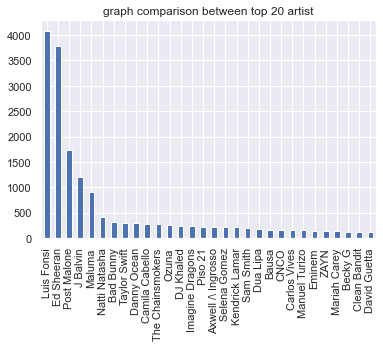

In [13]:
pos1["Artist"].value_counts()[:30].plot(kind="bar")
plt.title("graph comparison between top 20 artist")

Text(0.5, 1.0, 'graph comparison between top Tracks for first pos')

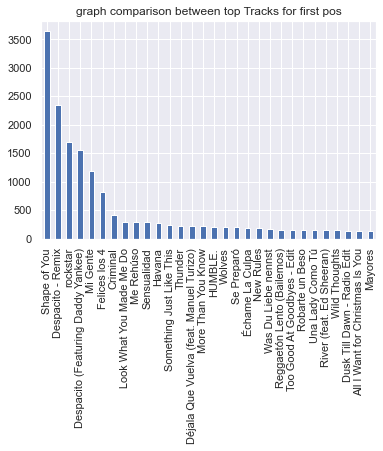

In [14]:
pos1["Track Name"].value_counts()[:30].plot(kind="bar")
plt.title("graph comparison between top Tracks for first pos")

In [15]:
pos1=data[data["Position"]>100]


In [16]:
pos1["Artist"].value_counts()
#Ed sheren has most amount of popular song

Ed Sheeran          49882
The Chainsmokers    23166
Drake               21712
Major Lazer         17278
Shawn Mendes        15188
                    ...  
Jake Isaac              1
EPP                     1
Niels & Wiels           1
VIXX                    1
ayokay                  1
Name: Artist, Length: 6424, dtype: int64

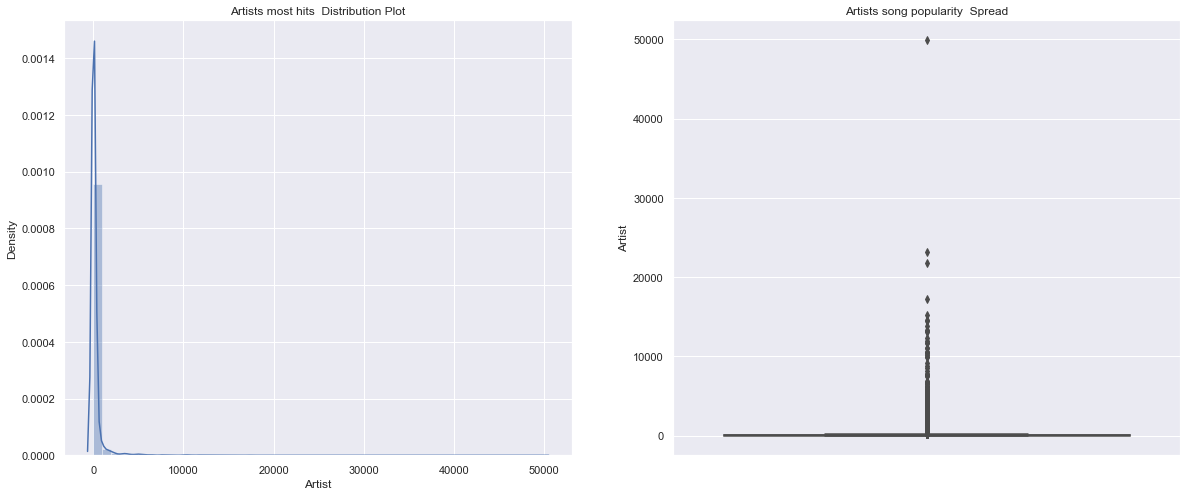

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Artists most hits  Distribution Plot')
sns.distplot(pos1["Artist"].value_counts())
plt.subplot(1,2,2)
plt.title('Artists song popularity  Spread')
sns.boxplot(y=pos1["Artist"].value_counts())

plt.show()

for track name

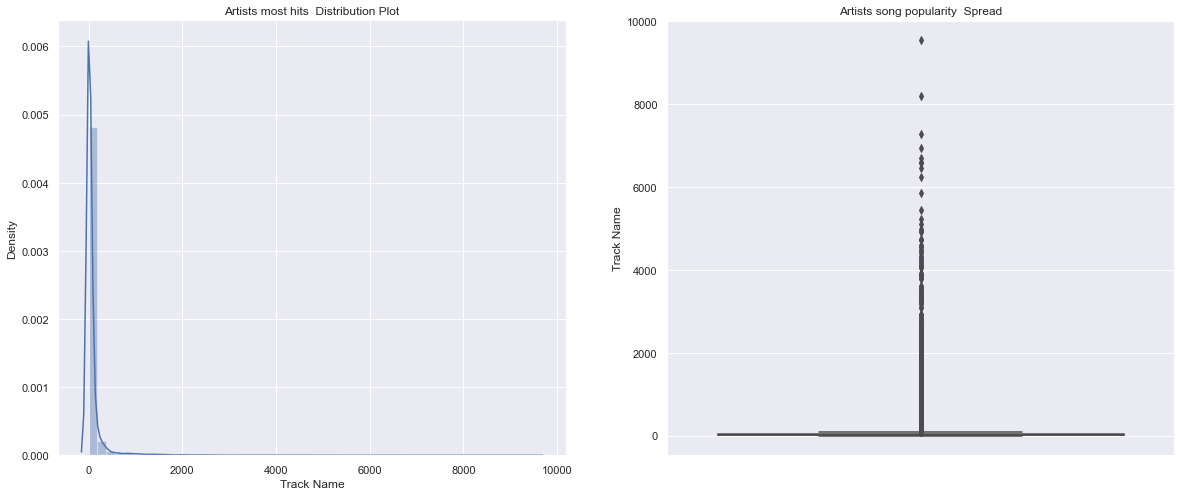

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Artists most hits  Distribution Plot')
sns.distplot(pos1["Track Name"].value_counts())
plt.subplot(1,2,2)
plt.title('Artists song popularity  Spread')
sns.boxplot(y=pos1["Track Name"].value_counts())

plt.show()

top 30 artists with most positions

Text(0.5, 1.0, 'Top 30 artist who has most hit songs')

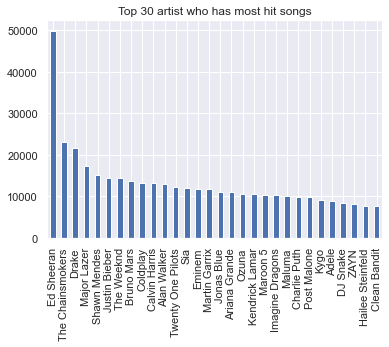

In [19]:
pos1["Artist"].value_counts()[:30].plot(kind="bar")
plt.title("Top 30 artist who has most hit songs")

# streams

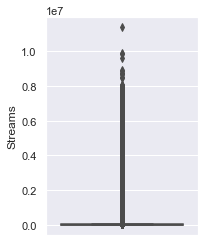

In [20]:
plt.subplot(1,2,2)
sns.boxplot(y=data.Streams)
plt.show()
#

In [21]:
data.groupby("Artist")["Streams"].sum().sort_values(ascending=False)[:30]
#Artist with most streams through out the years

Artist
Ed Sheeran          8913973976
Drake               4523630992
The Chainsmokers    4292590087
Post Malone         3700404149
Kendrick Lamar      3570665303
Luis Fonsi          3555514919
J Balvin            2494735971
Calvin Harris       2397708371
Imagine Dragons     2322921399
DJ Khaled           2236224259
The Weeknd          2225144099
Clean Bandit        2058671109
ZAYN                2018633468
Kygo                2016877886
Bruno Mars          1915554926
Lil Uzi Vert        1903703272
Martin Garrix       1866707135
Charlie Puth        1815408456
Maroon 5            1770872697
Migos               1769224015
Shawn Mendes        1745850599
Camila Cabello      1704460390
Future              1658173720
Major Lazer         1489305687
Khalid              1459421592
French Montana      1311955901
XXXTENTACION        1264164963
Dua Lipa            1247738973
Maluma              1233640551
Jason Derulo        1224859742
Name: Streams, dtype: int64

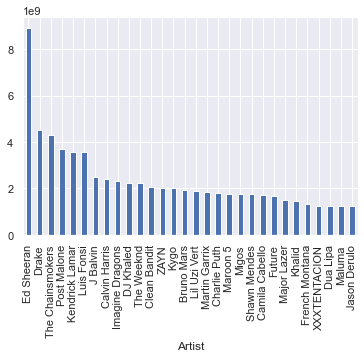

In [22]:
#top 30 artist with most amount of streams
data.groupby("Artist")["Streams"].sum().sort_values(ascending=False)[:30].plot(kind="bar")

most streamed tracks

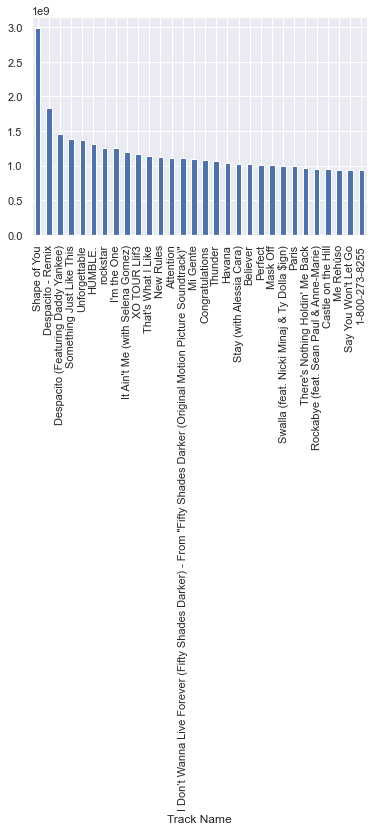

In [23]:
#top 30 artist with most amount of streams
data.groupby('Track Name')["Streams"].sum().sort_values(ascending=False)[:30].plot(kind="bar")

streamings on holidays
sat and sun

In [24]:
list=[]
for i in data["day"]:
    if i =="Sunday" or i=="Saturday":
        list.append("holiday")
    else:
         list.append("weekday")

In [27]:
dataf=data.copy()

In [28]:
dataf["type of day"]=list

In [29]:
dataf.groupby("type of day")["Streams"].sum()

type of day
holiday     50557481652
weekday    127953286640
Name: Streams, dtype: int64

Text(0.5, 1.0, 'streams in holiday vs weekdays')

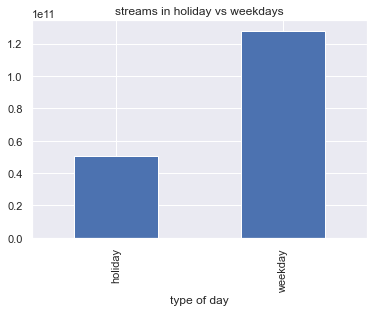

In [30]:
dataf.groupby("type of day")["Streams"].sum().plot(kind="bar")
plt.title("streams in holiday vs weekdays")

In [31]:
#this shows the no of streaming is high on weekdays

In [32]:
data.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region',
       'month', 'year', 'day'],
      dtype='object')

Text(0.5, 1.0, 'streams through out the months')

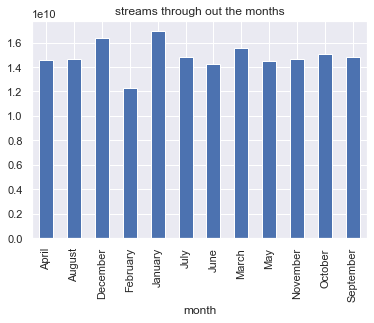

In [33]:
data.groupby("month")["Streams"].sum().plot(kind="bar")
plt.title("streams through out the months")
#this shows that most streaming happened in the month of january

streamings in year

Text(0.5, 1.0, 'streams through out the months')

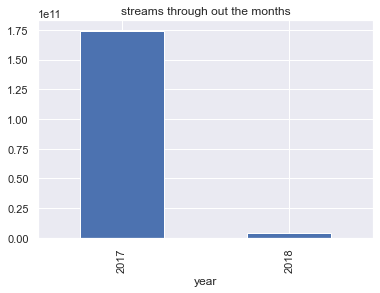

In [34]:
data.groupby("year")["Streams"].sum().plot(kind="bar")
plt.title("streams through out the months")

In [35]:
arr=[]
for i in data.Position:
    if i<=100:
        arr.append(int(1))
    else:
        arr.append(int(0))
data["popularity"]=arr

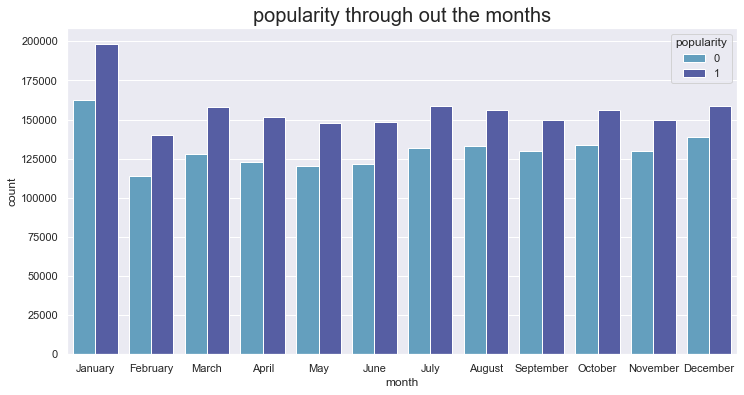

In [36]:
plt.subplots(figsize=(12,6))
sns.set_palette("icefire")
sns.countplot(x = "month",hue = "popularity",  data = data)
plt.title("popularity through out the months", fontsize = 20)
plt.show()

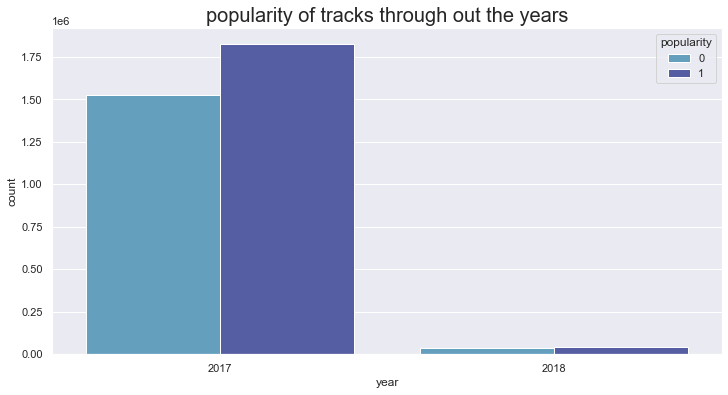

In [37]:
plt.subplots(figsize=(12,6))
sns.set_palette("icefire")
sns.countplot(x = "year",hue = "popularity",  data = data)
plt.title("popularity of tracks through out the years", fontsize = 20)
plt.show()

In [38]:
#the artist Luis Fonsi was the one to stay on the top most
ar=data[data["Artist"]=="Luis Fonsi"]


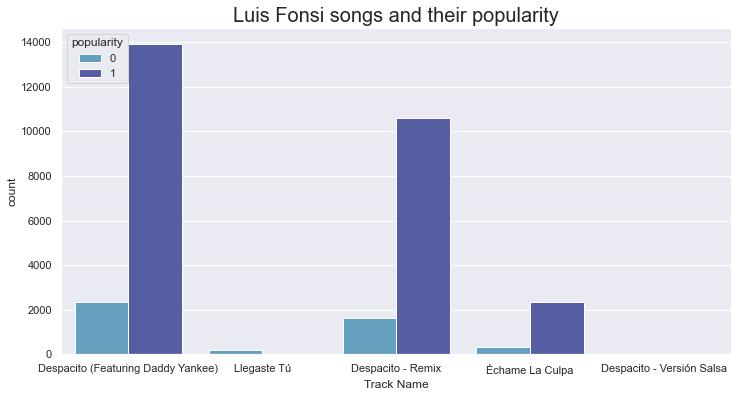

In [39]:

plt.subplots(figsize=(12,6))
sns.set_palette("icefire")
sns.countplot(x = "Track Name",hue = "popularity",  data = ar)
plt.title("Luis Fonsi songs and their popularity", fontsize = 20)
plt.show()

# ML models

In [40]:
import category_encoders as ce

In [41]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=["Track Name","Artist","URL","Date","year","day","month","Region"])
dataset=encoder.fit_transform(data)
dataset

,Position,Track Name,Artist,Streams,URL,Date,Region,month,year,day,popularity
0,1,1,1,19272,1,1,1,1,1,1,1
1,2,2,2,19270,2,1,1,1,1,1,1
2,3,3,3,15761,3,1,1,1,1,1,1
3,4,4,4,14954,4,1,1,1,1,1,1
4,5,5,5,14269,5,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3441192,196,513,238,2126,867,371,54,1,2,3,0
3441193,197,306,169,2117,2000,371,54,1,2,3,0
3441194,198,18555,2109,2112,21686,371,54,1,2,3,0
3441195,199,18358,6570,2102,21467,371,54,1,2,3,0


In [42]:
arr=[]
for i in dataset.Position:
    if i<=100:
        arr.append(int(1))
    else:
        arr.append(int(0))

In [43]:
dataset["popularity"]=arr
data["popularity"]=arr

checking for imbalanced data

In [44]:
data[data["popularity"]==1].shape,data[data["popularity"]==0].shape

((1873872, 11), (1566668, 11))

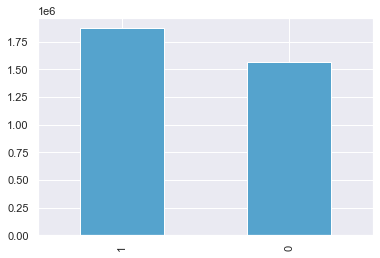

In [45]:
data.popularity.value_counts().plot(kind="bar")
#data is not imbalanced

bar plot for covariance of target columns to other

In [46]:
dataset.cov()["popularity"]

Position        -24.725090
Track Name     -337.636825
Artist          -88.722937
Streams       10038.727980
URL            -410.383176
Date             -0.765253
Region            0.249575
month            -0.022403
year             -0.000240
day              -0.004764
popularity        0.248007
Name: popularity, dtype: float64

Text(0.5, 1.0, 'covariance of target columns to other')

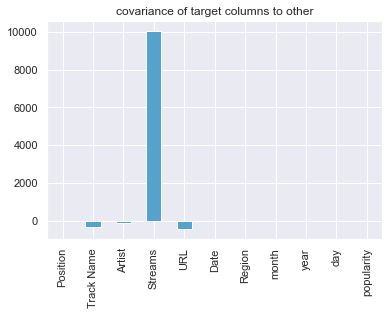

In [47]:
dataset.cov()["popularity"].plot(kind="bar")
plt.title("covariance of target columns to other")

bar plot for corelation of target columns to other

In [48]:
dataset.corr()["popularity"]

Position     -0.865045
Track Name   -0.158709
Artist       -0.124623
Streams       0.099904
URL          -0.162172
Date         -0.014370
Region        0.032857
month        -0.012777
year         -0.003109
day          -0.004777
popularity    1.000000
Name: popularity, dtype: float64

Text(0.5, 1.0, 'corelation of target columns to other')

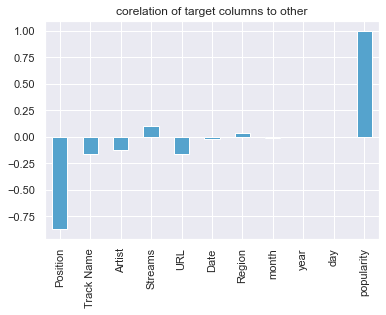

In [49]:
dataset.corr()["popularity"].plot(kind="bar")
plt.title("corelation of target columns to other")

Heat map:

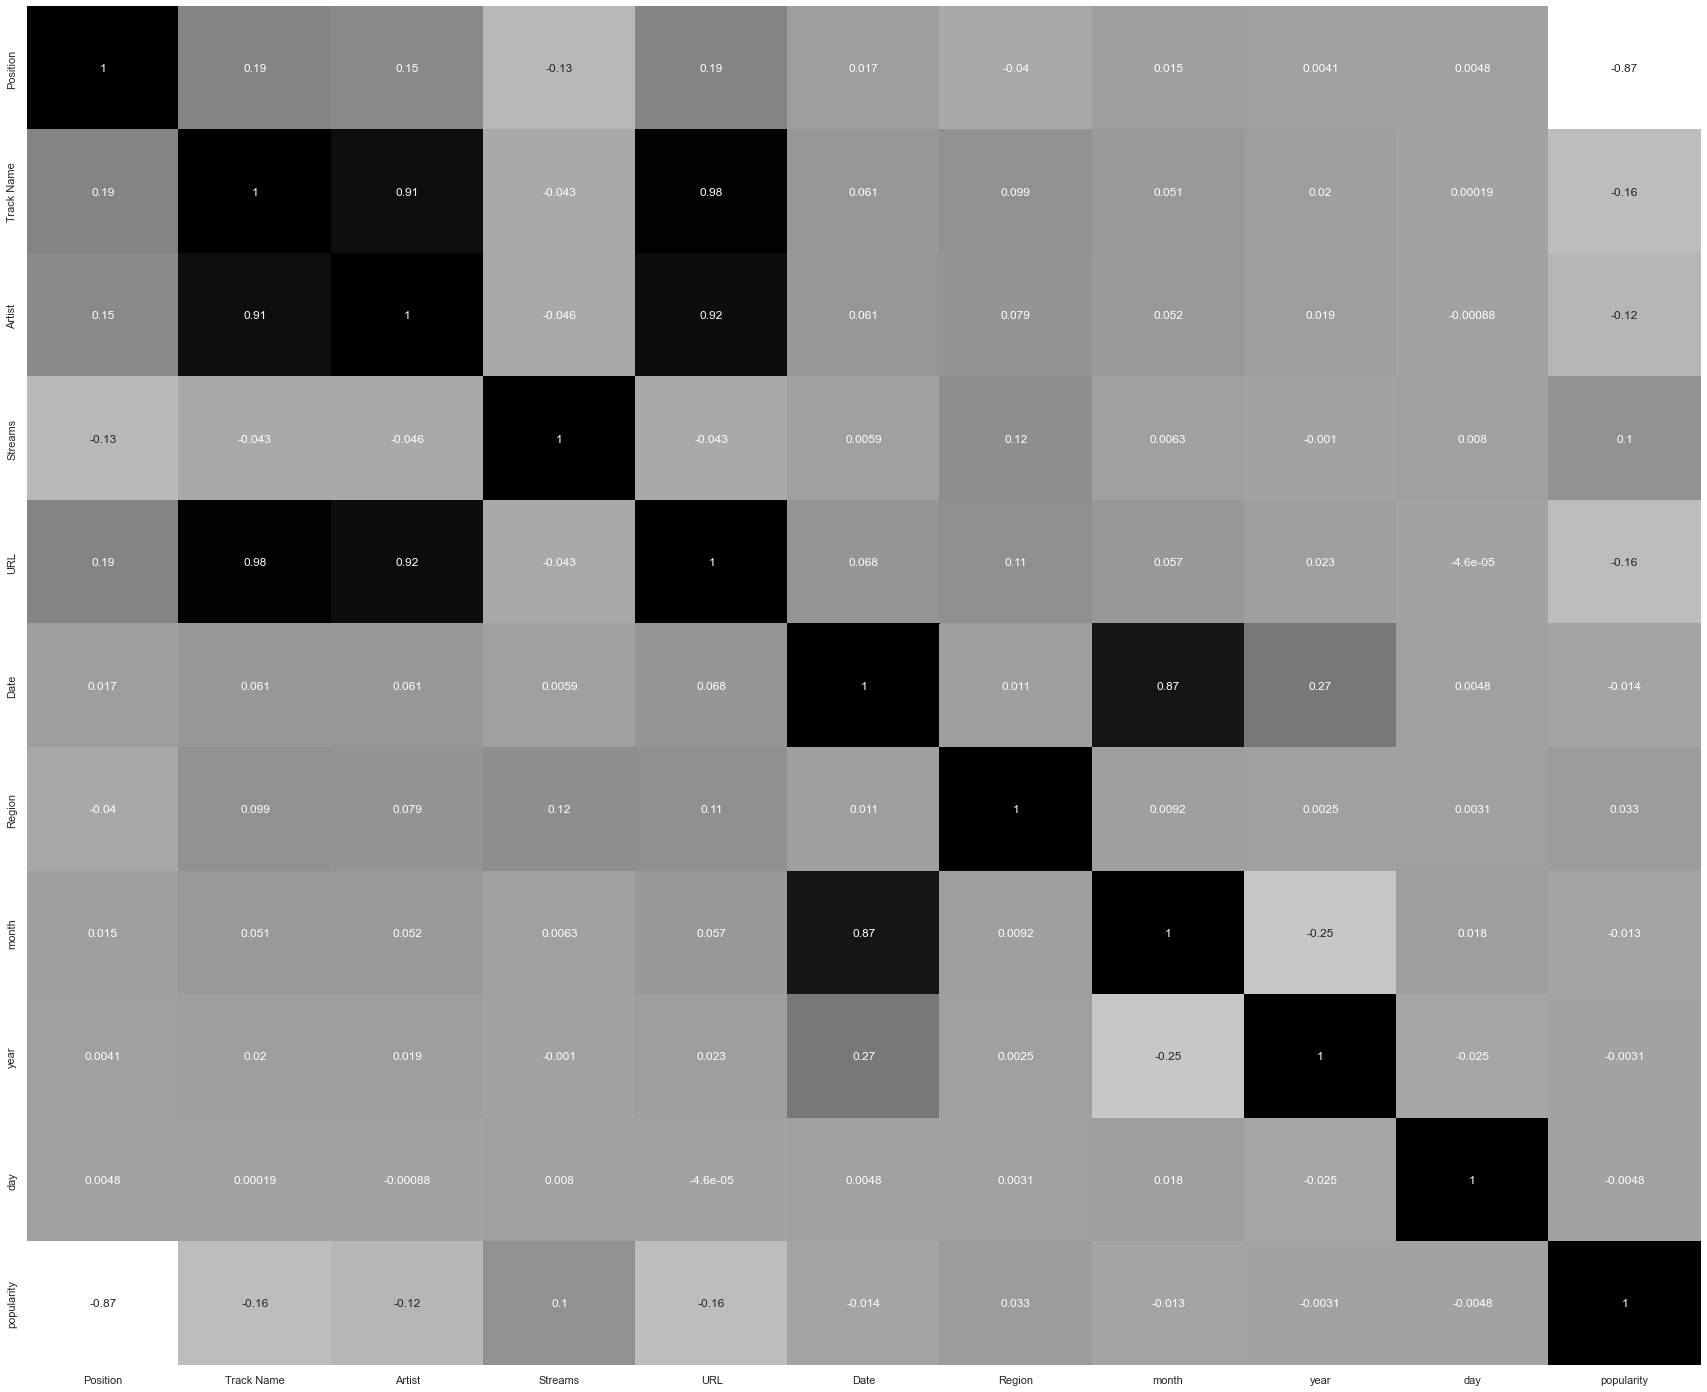

In [50]:
plt.figure(figsize=(30,25))

sns.heatmap(dataset.corr(),annot = True, cmap = "Greys", cbar = False)
plt.show()

DETERMINING X AND Y

In [51]:
X=dataset.drop(columns=["popularity"
                        ,"Position"])
y=dataset["popularity"]

In [52]:
X

,Track Name,Artist,Streams,URL,Date,Region,month,year,day
0,1,1,19272,1,1,1,1,1,1
1,2,2,19270,2,1,1,1,1,1
2,3,3,15761,3,1,1,1,1,1
3,4,4,14954,4,1,1,1,1,1
4,5,5,14269,5,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
3441192,513,238,2126,867,371,54,1,2,3
3441193,306,169,2117,2000,371,54,1,2,3
3441194,18555,2109,2112,21686,371,54,1,2,3
3441195,18358,6570,2102,21467,371,54,1,2,3


In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size=0.3, random_state=100)

In [55]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [56]:
y_pred_en = clf_entropy.predict(X_test)


y_pred_en

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

accuracy

In [57]:
accuracy=accuracy_score(y_test, y_pred_en)*100
accuracy

97.32357905057539

check for over and under fitting

In [58]:

print(clf_entropy.score(X_train,y_train)),print(clf_entropy.score(X_test,y_test))

1.0
0.9732357905057539


(None, None)

In [59]:
df[df["Track Name"]=="Tuo Fei Lun"]

,Position,Track Name,Artist,Streams,URL,Date,Region
3429379,183,Tuo Fei Lun,Eason Chan,2193,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2017-11-11,hk
3440380,184,Tuo Fei Lun,Eason Chan,2284,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-05,hk
3440569,173,Tuo Fei Lun,Eason Chan,2303,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-06,hk
3440784,188,Tuo Fei Lun,Eason Chan,2031,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-07,hk
3440989,193,Tuo Fei Lun,Eason Chan,2211,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-08,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk


In [60]:
dataset

,Position,Track Name,Artist,Streams,URL,Date,Region,month,year,day,popularity
0,1,1,1,19272,1,1,1,1,1,1,1
1,2,2,2,19270,2,1,1,1,1,1,1
2,3,3,3,15761,3,1,1,1,1,1,1
3,4,4,4,14954,4,1,1,1,1,1,1
4,5,5,5,14269,5,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3441192,196,513,238,2126,867,371,54,1,2,3,0
3441193,197,306,169,2117,2000,371,54,1,2,3,0
3441194,198,18555,2109,2112,21686,371,54,1,2,3,0
3441195,199,18358,6570,2102,21467,371,54,1,2,3,0


In [61]:
#input_data = ("Tuo Fei Lun","Eason Chan","2112","https://open.spotify.com/track/0pmGleExiQyd0Hx","2018-01-09","hk","Janruary","2018","Wednesday")

# changing the input_data to numpy array
#input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#input_data_reshaped=encoder.fit_transform(input_data_as_numpy_array)
# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

#prediction = clf_entropy.predict(std_data)
#print(prediction)

#if (prediction[0] == 0):
      #print('no')
#else:
     # print('yes')

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negataives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[455816  13813]
 [ 13812 548721]]

True Positives(TP) =  455816

True Negataives(TN) =  548721

False Positives(FP) =  13813

False Negatives(FN) =  13812


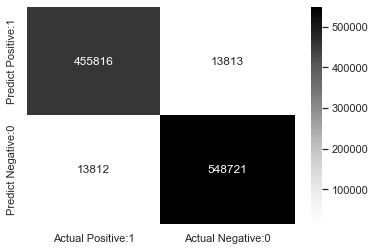

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greys')

classification report:

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    469629
           1       0.98      0.98      0.98    562533

    accuracy                           0.97   1032162
   macro avg       0.97      0.97      0.97   1032162
weighted avg       0.97      0.97      0.97   1032162



In [65]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification accuracy : 0.9732
Classification error : 0.0268


In [66]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9706


Roc curve:

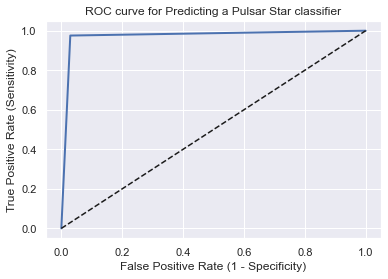

In [67]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_en)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [68]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_en)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9730


# without streams

In [69]:
X=dataset.drop(columns=["popularity"
                        ,"Position","Streams","Date"])
y=dataset["popularity"]

In [70]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:

X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size=0.3, random_state=100)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [72]:
y_pred_en = clf_entropy.predict(X_test)


y_pred_en

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

Accuracy

In [73]:
accuracy=accuracy_score(y_test, y_pred_en)*100
accuracy


90.16995394133866

check for over and under fitting

In [74]:
print(clf_entropy.score(X_train,y_train)),print(clf_entropy.score(X_test,y_test))

0.9523920248399546
0.9016995394133867


(None, None)

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negataives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])





Confusion matrix

 [[428250  41379]
 [ 60083 502450]]

True Positives(TP) =  428250

True Negataives(TN) =  502450

False Positives(FP) =  41379

False Negatives(FN) =  60083


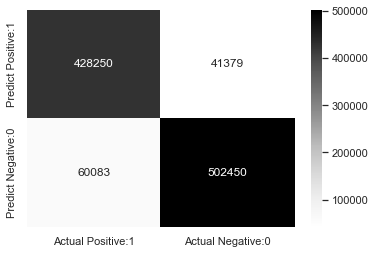

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greys')
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, y_pred_en))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

              precision    recall  f1-score   support

           0       0.88      0.91      0.89    469629
           1       0.92      0.89      0.91    562533

    accuracy                           0.90   1032162
   macro avg       0.90      0.90      0.90   1032162
weighted avg       0.90      0.90      0.90   1032162



In [78]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification accuracy : 0.9017
Classification error : 0.0983


In [79]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Recall or Sensitivity : 0.8770


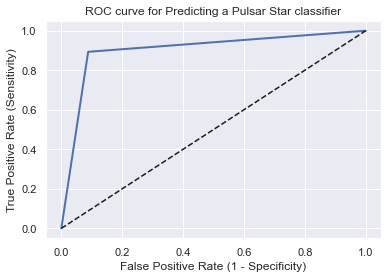

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_en)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [81]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_en)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9025


# predicting streams
regression model

In [82]:
X=dataset.drop(columns=["Streams"])
y=dataset["Streams"]

In [83]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size=0.3, random_state=100)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=20)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=20)

In [87]:
predict = model.predict(X_test)

In [88]:
predict = model.predict(X_test)
rmse=np.sqrt(np.mean(predict-y_test)**2)
rmse

6.671692040590528

In [89]:
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test,predict))}")

RMSE: 11518.043772336305


In [90]:
print(f"MAE: {metrics.mean_absolute_error(y_test,predict)}")

MAE: 1436.8423106062808


In [91]:
predict

array([98999.,  4292.,  1589., ..., 31383.,  2509., 36909.])

In [92]:
y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index()
predict=pd.DataFrame(predict)

In [93]:
y_test=y_test.drop(columns=["index"])


In [94]:
predict

,0
0,98999.0
1,4292.0
2,1589.0
3,4654.0
4,17146.0
...,...
1032157,4971.0
1032158,1971.0
1032159,31383.0
1032160,2509.0


In [95]:
pd.concat([y_test,predict],axis=1)

,Streams,0
0,88435,98999.0
1,4286,4292.0
2,1659,1589.0
3,4566,4654.0
4,18022,17146.0
...,...,...
1032157,4923,4971.0
1032158,1890,1971.0
1032159,31233,31383.0
1032160,2530,2509.0
